In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
from yahoo_fin import stock_info
import datetime as dt

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import svm
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split

C:\Users\carte\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\carte\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

In [32]:
ticker = 'SQ'

start = dt.datetime.now() - dt.timedelta(days=10000)
end = dt.datetime.now()

In [33]:
df = stock_info.get_data(ticker, start_date=start,  end_date=end)

In [34]:
df.head()

,open,high,low,close,adjclose,volume,ticker
2015-11-19,11.20,14.78,9.00,13.07,13.07,47466100,SQ
2015-11-20,13.92,14.05,12.50,12.85,12.85,16550300,SQ
2015-11-23,13.00,13.15,12.10,12.12,12.12,5172200,SQ
2015-11-24,12.00,12.23,11.52,12.02,12.02,4714700,SQ
2015-11-25,12.12,12.40,11.85,11.90,11.90,3583400,SQ


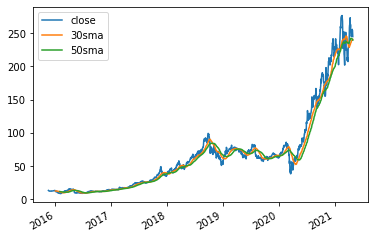

In [35]:
df['30sma'] = df['close'].rolling(window=30).mean()
df['50sma'] = df['close'].rolling(window=50).mean()
df[['close', '30sma', '50sma']].plot()
plt.show()

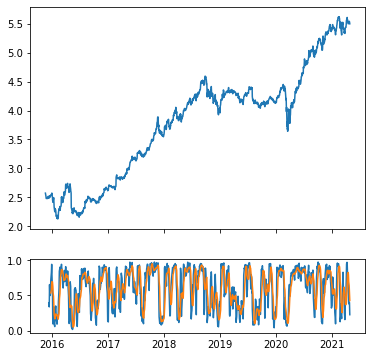

In [36]:
k_period = 3
d_period = 10

df['low30'] = df['low'].rolling(window=14).min()
df['high30'] = df['high'].rolling(window=14).max()
df['slow_stoch'] = (df['close'] - df['low30']).rolling(window=k_period).sum() / (df['high30'] - df['low30']).rolling(window=3).sum()
df['slow_stoch_3ma'] = df['slow_stoch'].rolling(window=d_period).mean()


fig, ax = plt.subplots(2, 1, sharex=True, figsize=(6, 6), gridspec_kw={'height_ratios': [3, 1]})

ax[0].plot(df.index, np.log(df['close']))
ax[1].plot(df.index, df['slow_stoch'])
ax[1].plot(df.index, df['slow_stoch_3ma'])
plt.show()

In [37]:
df['close_diff'] = df['close'].shift(-1) - df['close']
df['slow_stoch_diff'] = df['slow_stoch'] - df['slow_stoch'].shift()
df['slow_stoch_3ma_diff'] = df['slow_stoch_3ma'] - df['slow_stoch_3ma'].shift()

In [38]:
df.tail()

,open,high,low,close,adjclose,volume,ticker,30sma,50sma,low30,high30,slow_stoch,slow_stoch_3ma,close_diff,slow_stoch_diff,slow_stoch_3ma_diff
2021-04-26,248.270004,256.970001,246.300003,255.770004,255.770004,8494400,SQ,239.422333,241.373999,236.000000,278.130005,0.404418,0.639076,-1.980011,0.021710,-0.056508
2021-04-27,256.959991,260.809998,253.399994,253.789993,253.789993,6791500,SQ,239.507666,240.994799,240.339996,278.130005,0.396784,0.582543,0.410004,-0.007634,-0.056533
2021-04-28,253.000000,258.970001,249.399994,254.199997,254.199997,6140700,SQ,239.868999,240.558399,240.339996,278.130005,0.399966,0.533606,-6.440002,0.003182,-0.048936
2021-04-29,257.358002,259.880005,245.009995,247.759995,247.759995,6567800,SQ,239.911999,240.094799,240.339996,278.130005,0.306342,0.480708,-2.939987,-0.093624,-0.052898
2021-04-30,244.240005,249.959900,243.404999,244.820007,244.820007,4960774,SQ,240.595999,239.574199,240.339996,278.130005,0.227221,0.428498,NaN,-0.079121,-0.052211


In [39]:
lr = LogisticRegression()
svc = svm.SVC()
gp = GaussianProcessClassifier()

In [40]:
df2 = df.dropna(subset=['slow_stoch', '30sma', '50sma'])

features = pd.DataFrame()

features['X1'] = df2['slow_stoch'] 
features['X2'] = df2['slow_stoch_3ma']
features['X3'] = df2['slow_stoch'] - df2['slow_stoch_3ma']
features['X4'] = df2['close'] - df2['30sma']
features['X5'] = df2['close'] - df2['50sma']

X = features
y = df2['close_diff'] > 0

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [41]:
lr = lr.fit(X_train, y_train)
svc = svc.fit(X_train, y_train)
gp = gp.fit(X_train, y_train)

C:\Users\carte\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\carte\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [42]:
y_pred_lr = lr.predict_proba(X_test)[:, 1]
y_pred_svc = svc.predict(X_test)
y_pred_gp = gp.predict_proba(X_test)[:, 1]

In [43]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr) 
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_pred_svc) 
fpr_gp, tpr_gp, thresholds_gp = roc_curve(y_test, y_pred_gp) 

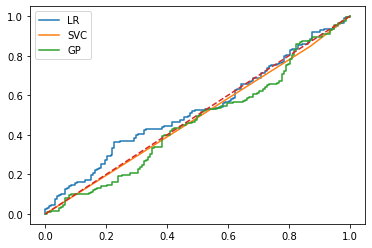

In [44]:
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot(fpr_svc, tpr_svc, label='SVC')
plt.plot(fpr_gp, tpr_gp, label='GP')
plt.plot([0,1], [0,1], linestyle='--')
plt.legend()
plt.show()